In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
pd.set_option('display.max_columns', 500)

In [2]:
## subjects 
subjects = pd.read_csv('../../DerivedData/subject_matching_removeCC00060XX03.csv', index_col=0)
## file with QC 
qc = pd.read_csv('../../SourceData/release3_subject_info.tsv', sep='\t')
qc['participant_id '] =  qc['participant_id '].str.rstrip()
shard_qc_cols = ['qc_dmri_shard_snr ', 'qc_dmri_shard_translation ', 'qc_dmri_shard_rotation ', 'qc_dmri_shard_outlier_ratio ',
                'qc_dmri_shard_fail_visual_qc ', 'qc_dmri_shard_comments ', 'qc_dmri_shard_comments_recon ']
eddy_qc_cols = ['qc_dmri_eddy_abs_motion ', 'qc_dmri_eddy_rel_motion ', 'qc_dmri_eddy_snr_b0 ',
               'qc_dmri_eddy_cnr_b0400 ', 'qc_dmri_eddy_cnr_b1000 ', 'qc_dmri_eddy_cnr_b2500 ', 
               'qc_dmri_eddy_percent_outlier_slices ', 'qc_dmri_eddy_comment ']

In [3]:
preterm_qc = qc[ (qc['participant_id '].isin(subjects['preterm_ID'].values)) & (qc['session_id '].isin(subjects['preterm_session'].values))]
control_qc = qc[ (qc['participant_id '].isin(subjects['matched_ID_with_outcome'].values))]

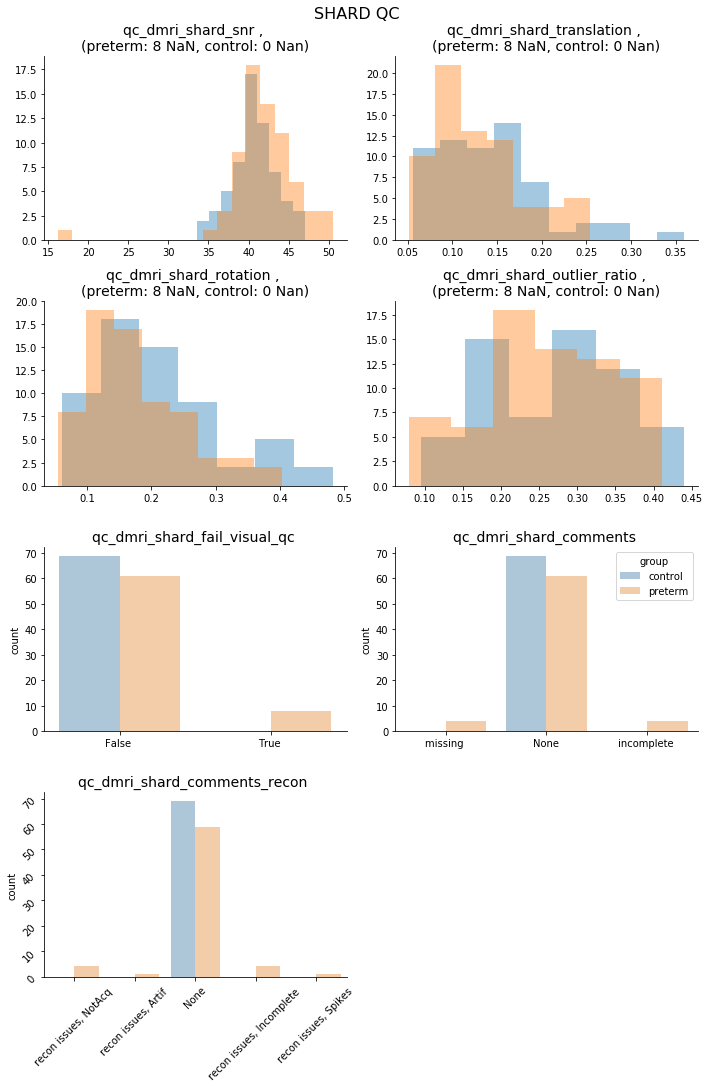

In [10]:
#sns.set_palette('Set2')

fig, axs =  plt.subplots(4,2, figsize=(10,15))#, sharey=True)
axes = axs.ravel()


for i, key in enumerate(shard_qc_cols[:4]):
    sns.distplot(preterm_qc[key].dropna().values, ax=axes[i], label='preterm', kde=False)
    sns.distplot(control_qc[key].dropna().values, ax=axes[i], label='control', kde=False)
    axes[i].set_title('{}, \n(preterm: {} NaN, control: {} Nan)'.format(key, 
                                                                    preterm_qc[key].isna().sum(),
                                                                    control_qc[key].isna().sum()
                                                                    ), fontsize=14)
    
for i, key in enumerate(shard_qc_cols[4:]):
    j = 4+i
    
    df = pd.DataFrame()
    
    preterm_qc[key].fillna('None', inplace=True)#, inplace=True)
    control_qc[key].fillna('None', inplace=True)#, inplace=True)

    cats = list(set(list(np.unique(preterm_qc[key].values)) + \
            list(np.unique(control_qc[key].values))))


    d = { 'categories' : cats, 
     'preterm' : np.array([len(preterm_qc[preterm_qc[key] == cat]) for cat in cats]), 
    'control' : np.array([len(control_qc[control_qc[key] == cat]) for cat in cats]) 
        }

    df = pd.DataFrame(data=d)
    df = pd.melt(df, id_vars='categories', var_name='group', value_name='count') 
    
    sns.barplot( x='categories', y='count', hue='group', data = df, ax=axes[j], alpha=0.4)
    axes[j].set_title(key, fontsize=14)
    axes[j].set(xlabel='')
    if j != 5:
        axes[j].legend_.remove() 
    
    
#axes[1].legend()
axes[-1].set_axis_off()
axes[-2].tick_params(labelrotation=45)
sns.despine()
plt.suptitle('SHARD QC', y=1.005, fontsize=16)
plt.tight_layout()

fig.savefig('../../Results/figures/shardQC_preterms_vs_controls.jpg', bbox_inches='tight')
plt.show()

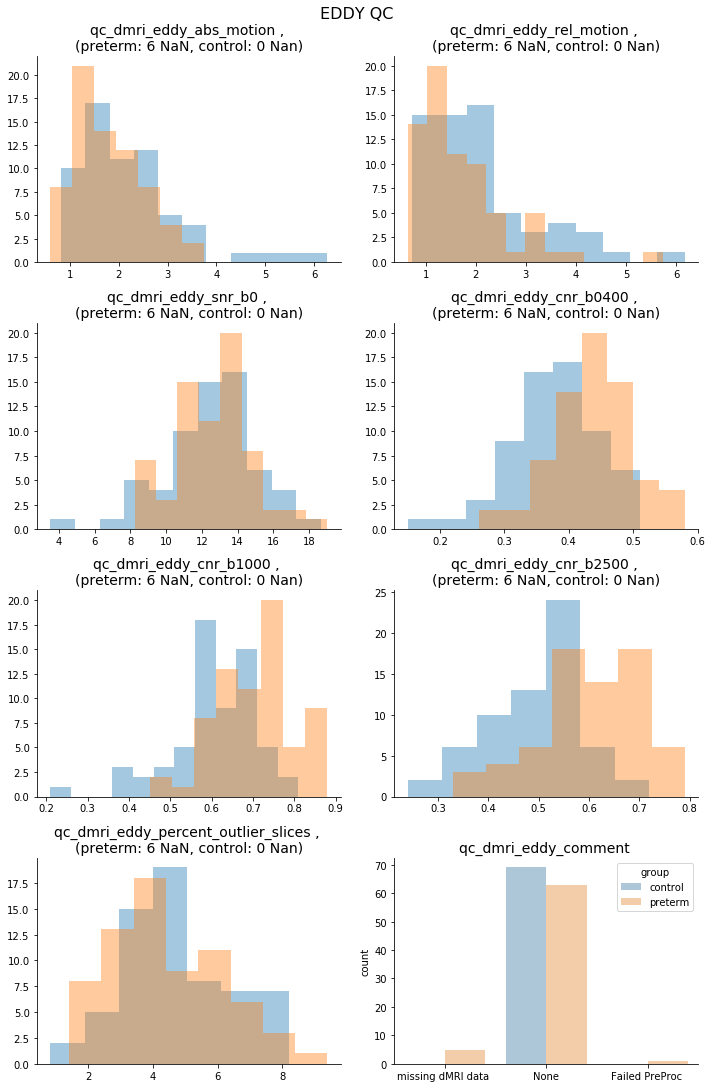

In [11]:
#sns.set_palette('Set2')
fig, axs =  plt.subplots(4,2, figsize=(10,15))#, sharey=True)
axes = axs.ravel()


for i, key in enumerate(eddy_qc_cols[:-1]):
    sns.distplot(preterm_qc[key].dropna().values, ax=axes[i], label='preterm', kde=False)
    sns.distplot(control_qc[key].dropna().values, ax=axes[i], label='control', kde=False)
    axes[i].set_title('{}, \n(preterm: {} NaN, control: {} Nan)'.format(key, 
                                                                    preterm_qc[key].isna().sum(),
                                                                    control_qc[key].isna().sum()
                                                                    ), fontsize=14)
key = eddy_qc_cols[-1]

df = pd.DataFrame()
    
preterm_qc[key].fillna('None', inplace=True)#, inplace=True)
control_qc[key].fillna('None', inplace=True)#, inplace=True)

cats = list(set(list(np.unique(preterm_qc[key].values)) + \
            list(np.unique(control_qc[key].values))))


d = { 'categories' : cats, 
     'preterm' : np.array([len(preterm_qc[preterm_qc[key] == cat]) for cat in cats]), 
    'control' : np.array([len(control_qc[control_qc[key] == cat]) for cat in cats]) 
        }

df = pd.DataFrame(data=d)
df = pd.melt(df, id_vars='categories', var_name='group', value_name='count') 
    
sns.barplot( x='categories', y='count', hue='group', data = df, ax=axes[-1], alpha=0.4)
axes[-1].set_title(key, fontsize=14)
axes[-1].set(xlabel='')
    
#axes[1].legend()
sns.despine()
plt.suptitle('EDDY QC', y=1.005, fontsize=16)
plt.tight_layout()
fig.savefig('../../Results/figures/eddyQC_preterms_vs_controls.jpg', bbox_inches='tight')
plt.show()